<a href="https://colab.research.google.com/github/Aryan-Seth/Autoencoder_Audio_Denoising/blob/main/Audio_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import math 
import warnings
import scipy
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from IPython import get_ipython
import soundfile
import librosa
import librosa.display
import numpy as np
import pandas as pd 
from scipy.io import wavfile
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as vision
import torch.nn.functional as F
from torch.nn import MSELoss

In [2]:
import soundfile as sf
print(sf.__file__)
print(sf._libname)

/usr/local/lib/python3.7/dist-packages/soundfile.py
libsndfile.so.1


In [3]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# df=pd.read_csv()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.head())

                                                Path label  no of flutes  \
0  C:\Users\aseth\Desktop\audio_coolant_wav\s-600...     N             4   
1  C:\Users\aseth\Desktop\audio_coolant_wav\s-600...     N             4   
2  C:\Users\aseth\Desktop\audio_coolant_wav\s-600...     I             4   
3  C:\Users\aseth\Desktop\audio_coolant_wav\s-600...     Y             4   
4  C:\Users\aseth\Desktop\audio_coolant_wav\s-600...     Y             4   

      t  Unnamed: 4 Unnamed: 5  
0  t=50         NaN        NaN  
1  t=50         NaN        NaN  
2  t=50         NaN        NaN  
3  t=50         NaN        NaN  
4  t=50         NaN        NaN  


In [11]:
# s=df.iloc[138,0]
s='/content/drive/MyDrive/s-7000f-200d-2t-50.m4a'
# print(s)
y,sr=librosa.load(s)
y=y[20000:35000]

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-4.9132427e+01+0.0000000e+00j -4.8461933e+01+0.0000000e+00j
  -4.8181690e+01+0.0000000e+00j ... -4.1037617e+01+0.0000000e+00j
  -4.0003353e+01+0.0000000e+00j -3.0634613e+01+0.0000000e+00j]
 [ 2.6008247e+01-3.7608805e-15j  2.3483452e+01+5.9472352e-01j
   2.3641365e+01-2.5700924e-01j ...  2.0105824e+01-3.1910119e+00j
   2.4451799e+01+3.9320824e+00j  1.0284811e+01+5.5110102e+00j]
 [-9.0614843e-01+3.0726708e-16j  2.4958999e+00-1.3410981e+00j
  -2.1327424e+00-2.4267609e+00j ...  1.6915290e+00+2.3988490e+00j
  -4.7845874e+00-5.4246479e-01j  6.6650319e+00-6.6294250e+00j]
 ...
 [-1.2381656e+00-8.2594940e-16j  6.1911380e-01-7.2226305e-07j
  -3.6035166e-05-2.1158203e-05j ... -8.8377947e-06-7.7884815e-06j
   7.5186171e-02+1.0007317e-01j -2.5746846e-01-3.4272853e-01j]
 [ 1.2381258e+00+1.3183898e-15j -3.9080922e-05-6.1905617e-01j
   2.1979940e-05+1.6218706e-05j ...  2.5325005e-05-9.5657497e-06j
  -5.5941053e-02+1.1194663e-01j  3.8348317e-01+1.9156308e-01j]
 [-1.2380801e+00+0.0000000e+00j -6.19022

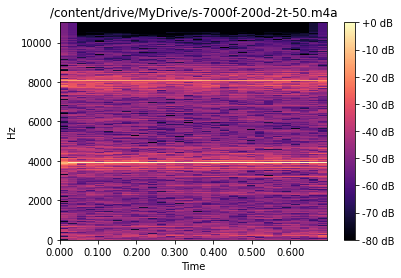

In [12]:
value_df=pd.DataFrame()
D=librosa.stft(y)
print(D)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title=s)
fig.colorbar(img, ax=ax, format="%+2.f dB")
print(len(y))


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


/content/drive/MyDrive/s-7000f-200d-2t-50.m4a
[0.         0.         0.         ... 0.10601848 0.12883791 0.27804556]
2.785986394557823
5125
26713.340136869534
cpu
tensor(453.0356, grad_fn=<MseLossBackward0>)


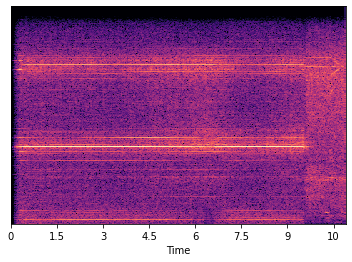

In [14]:
# for i in range (0,len(df)):
# s=df.iloc[i,2]
# print(s)
s='/content/drive/MyDrive/s-7000f-200d-2t-50.m4a'
y,sr=librosa.load(s)
D=librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max), x_axis='time')

s=np.array(s)
print(s)
s=[]
k=abs(y)
for i in range (0,len(y)-100):
    s.append(sum(k[i:i+100]))
d=[]
for j in range (1,len(y)):
    d.append(k[j]-k[j-1])
d=np.array(d)
print(d)
print(np.argmax(d)/sr)
sec_val=np.argmax(d)
mse_loss=MSELoss()
a=y[sec_val:sec_val+2200]
a=librosa.stft(a)
a=abs(a)
a=a.flatten()
imp=len(a.flatten())
print(imp)
print(sum(a))

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.l1=nn.Linear(in_features=imp,out_features=1000)
        self.l2=nn.Linear(in_features=1000,out_features=200)
        self.l3=nn.Linear(in_features=200,out_features=20)
        self.d4=nn.Linear(in_features=20,out_features=imp)

    def forward(self, x):
        x = F.selu(self.l1(x))
        x = F.selu(self.l2(x))
        y=self.l3(x)
        z = F.selu(y)
        
        x=self.d4(z)

        return x,y,z

model=Model()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)
# model.cuda()
a=torch.Tensor(a)    
# a=a.to("cuda")
print(a.device)
for step in range(0,200):
    pre,need,z= model.forward(a)
    optimizer.zero_grad()
    cost=mse_loss(pre,a)
    cost.backward()
    optimizer.step()

print(cost)
# s=pd.Series(need.cpu().detach().numpy())
# value_df=value_df.append(s,ignore_index=True)   

